# 3.4 Resonance

## 3.4.1 Review of second order systems

The second order transfer functions between power conjugate variables  
previously derived for the translational mechanical system  
and the analogous electrical system are repeated below  
![image1!](./images_s3/image_3_4_1.png)  

## 3.4.2 The pendulum - a rotational mechanical system

Our discussion is going to turn to resonance.  For that discussion, we will introduce the pendulum, or the swing  
Because the swing is a very well known and intutive resonant system, it is often used to decribe resonance  
In fact, the wikipedia article on resonance shows a picture of a person on a swing  
[resonance](https://en.wikipedia.org/wiki/Resonance)  
  
The pendulum is a second order system with power conjugate variables; torque, $\tau$, and radial velocity, $\omega$  
In order for a system to be second order, it must contain two differential relations between power conjugate variables  
  
The first differential relationship comes from Netwon's law; $F=ma$  
Just as Newton's law describes motion for the translational mechanical system,  
it is used in the same form for the rotational mechanical system; $\tau=I\alpha=I\frac{d\omega}{dt}$,  
where $I$ is the moment of inertia around the point of rotation and $\alpha$ is the radial acceleration  
  
The spring supplied the second differential relationship for the translational mechanical system, through Hooke's law  
The spring provides a force that tries to restore the ball back to its equilibrium position  
In the case of the pendulum, gravity tries to restores the mass of the pendulum back to its equlibrium position  
thus, gravity will provide the second differential relationship for the pendulum  
  
For a spring, the restoring force depends on the position, $x$, from Hooke's law, $F=kx$  
Assume $\phi$ is the angular position of the pendulum  
The restoring torque depends on $\phi$ from, $\tau=(F_gl)\phi$, where $F_g$ is the force of gravity and $l$ is the length of the pendulum  
  
The rotational free body diagram with the system torques is shown below  
[pendulum](https://en.wikipedia.org/wiki/Pendulum)  
![image2!](./images_s3/image_3_4_2.png)  

Using D'Alembert's principle for rotational mechanics  
$$\sum\tau=0$$  
simply add up the torques  
$$\tau_{inertial}+\tau_{drag}+\tau_{restoring}-\tau_{applied}=0$$  
substitute  
$$I\frac{d\omega}{dt}+b\omega+F_gl\int{\omega\;dt}=\tau_{applied}$$  
convert to the frequency domain assuming zero initial conditions  
$$Is\omega+b\omega+F_gl\frac{\omega}{s}=\tau_{applied}$$  
multiply by $s$ and collect the terms  
$$(Is^2+bs+F_gl)\omega=s\tau_{applied}$$
finally, write the transfer function  
$$H(s)=\frac{\omega(s)}{\tau(s)}=\frac{s\frac{1}{I}}{s^2+\frac{b}{I}s+\frac{F_gl}{I}}$$  
And of course, we can integrate to get the transfer function for the position  
$$H(s)=\frac{\phi(s)}{\tau(s)}=\frac{\frac{1}{I}}{s^2+\frac{b}{I}s+\frac{F_gl}{I}}$$

There are two cases for the moment of inertia  
[moment of inertia](https://en.wikipedia.org/wiki/List_of_moments_of_inertia)
1. The mass is concentrated at the end of the pendulum (as shown in the drawing)  
 $I=ml^2$
2. The mass is uniformly distributed along the length of the pendulum arm  
 $I=\frac{1}{3}ml^2$  
  
Given the first case and knowing $F_g=mg$, the transfer function becomes  
$$H(s)=\frac{\phi(s)}{\tau(s)}=\frac{\frac{1}{ml^2}}{s^2+\frac{b}{ml^2}s+\frac{g}{l}}$$

## 3.4.3 Being pushed on a swing

The swing is an example of a pendulum  
when you push someone on the swing, you are applying an impulse of torque to the system  
  
Let's create an example system by assuming  
$m=20$ [kg] (45 pounds)  
$l=2$ [m] (6 feet)  
$b=50$ [Nms] (wild guess for amount of friction or drag)  
$\tau_{applied}$ is an impulse of 40[Nms] (push with 5 pounds of force for 1 second)  
in other words, $\tau(t)=40\delta(t)\Rightarrow\tau(s)=40$
  
The position will be given by  
$$\phi(s)=\frac{\frac{1}{ml^2}}{s^2+\frac{b}{ml^2}s+\frac{g}{l}}\cdot\tau(s)$$

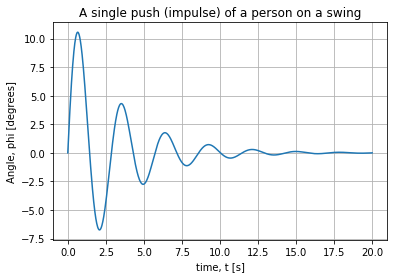

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# enter constants
g = 9.81 # m/s^2
m = 20 # kg
l = 2 # m
b = 50 # Nms
tau = 40 # an impulse with units [Nms], the integral of torque over time

# create the lti object
# the numerator must be multiplied by the Laplace transform of the applied torque
num = [tau/(m*l**2)]
den = [1, b/(m*l**2), g/l]

phi_s = sig.lti(num, den)

# create a time array
t = np.linspace(0, 20, 1000)

# use the impulse method to find the response
t, phi = phi_s.impulse(T=t)
plt.plot(t, np.degrees(phi))
plt.xlabel('time, t [s]')
plt.ylabel('Angle, phi [degrees]')
plt.title('A single push (impulse) of a person on a swing')
plt.grid()

You can see the person on the swing starts out at angle $0^\circ$, and then gets pushed  
the push sends them past $10^\circ$ and they swing back and forth, slowly decaying, and stopping after about 20 seconds  

## 3.4.4 Pushing more than once - the Dirac comb

The impulse function, $\delta(t)$ is heuristically defined as  
$$\delta(t)\rightarrow\infty\;at\;t=0$$  
$$\delta(t)=0\;for\;t\ne0$$  
$$\int_{-\infty}^{+\infty}\delta(t)dt=1$$  
  
If we create a sequence, often called a train, of impulses that repeat at a constant period, the shape looks like a comb  
The impulse is called a Dirac delta function, named for the famous physicist,  
so a train of impulses is called a Dirac comb  
[Dirac comb](https://en.wikipedia.org/wiki/Dirac_comb)  
  
The code below approximates the Dirac comb  
Numerically you can only approximate the delta function with a short pulse,  
because you can't represent infinity numerically  
It's important to make the area under the pulse equal to 1

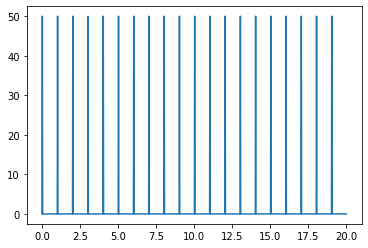

In [2]:
# create a Dirac comb
# the time array has 1000 elements, each 0.02 seconds wide (20 seconds/1000)
# make the pulse height equal 50, 50 * 0.02 = 1
u = np.zeros(1000)
period=1.0
int_t = round(50.0*period)
for i in range(1, 1000, int_t):
    u[i] = 50.0

# plot the Dirac comb
plt.plot(t, u)

The code cell below uses the lti object ".output" method to compute the response to the Dirac comb  

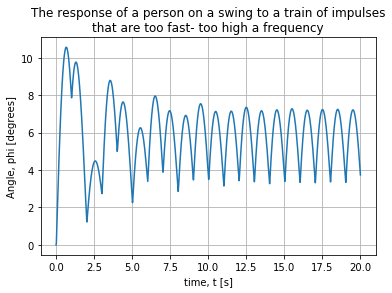

In [3]:
# use the output method to find the response to the Dirac comb
t, phi, x = phi_s.output(U=u, T=t)
plt.plot(t, np.degrees(phi))
plt.xlabel('time, t [s]')
plt.ylabel('Angle, phi [degrees]')
plt.title('The response of a person on a swing to a train of impulses\nthat are too fast- too high a frequency')
plt.grid()

You can see we are not pushing the person on the swing with the correct timing  
Pushing once a second is too fast, or too high a frequency  
  
The result does not cause the person to swing higher, in fact it keeps them from swinging well at all  
Once steady state is reached, the person only swings for a total arc of only about $3^\circ$  
  
We really want the person to swing all the way up and all the way back,  
and then push them when they come back through the bottom again  
  
Let's make a guess and push the person on the swing much more slowly, once every 5 seconds  

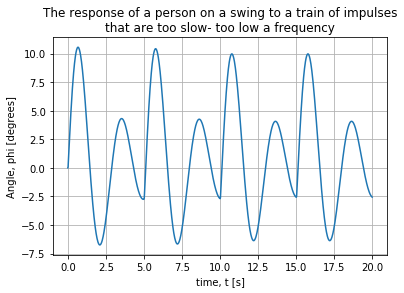

In [4]:
# create a Dirac comb
u = np.zeros(1000)
period=5
int_t = round(50.0*period)
for i in range(1, 1000, int_t):
    u[i] = 50.0

# use the output method to find the response to the Dirac comb
t, phi, x = phi_s.output(U=u, T=t)
plt.plot(t, np.degrees(phi))
plt.xlabel('time, t [s]')
plt.ylabel('Angle, phi [degrees]')
plt.title('The response of a person on a swing to a train of impulses\nthat are too slow- too low a frequency')
plt.grid()

Now we are waiting too long before we push them again, too low of a frequency  
They are basically starting over every time we push them  
  
The question is, how do we choose the correct timing?  
It's easy when you are playing on the playground, you know right when to push them,  
but what about mathematically?  How do we know how much time between pushes mathematically?

## 3.4.5 The resonant peak

Let's tackle the question by making a Bode plot  
The figure below shows the Bode plot for $\phi(s)$  
along with two vertical line which indicates the two frequencies we tested  
The frequency beyond the resonant peak had a period of 1 second (too high),  
while the frequency below the resonant peak had a period of 5 seconds (too low)  

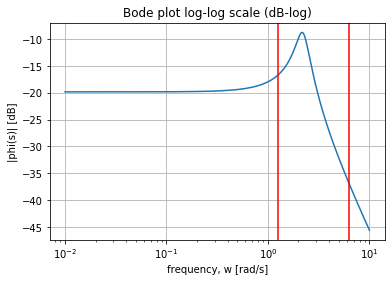

In [5]:
w = np.logspace(-2, 1, 1000)
w, mag, angle = phi_s.bode(w=w)
plt.plot(w, mag)

plt.axvline(2*np.pi/1, color='red')
plt.axvline(2*np.pi/5, color='red')

plt.xscale('log')
plt.xlabel('frequency, w [rad/s]')
plt.ylabel('|phi(s)| [dB]')
plt.title('Bode plot log-log scale (dB-log)')
plt.grid()

The resonant peak occurs very close to the natural frequency of the system, $\omega_n$,  
where $\omega_n\equiv$ magnitude of the complex pole  
Of course, the y-axis of the Bode plot shows how strongly the system responds to the input  
So the resonant peak shows what frequency input sin/cos wave give the largest response   

You should reason that the resonant peak is associated with  
the correct amount of time to wait until you push the person on the swing  
You want to push the swing at the resonant frequency  
  
The frequency in [rad/s] is related to the period of the Dirac comb, by using $\omega=2\pi f$  
$f=\frac{1}{period}\Rightarrow period=\frac{2\pi}{\omega}$

In [6]:
w_max = np.abs(phi_s.poles[0])
print('omega max =', w_max)
print('period =', 2*np.pi/w_max)

omega max = 2.21472345903501
period = 2.8370067068857754


Although the Bode plot is telling us how the system responds to sin/cos waves,  
rather than a train of impulses, the frequency is what we are most interested in  
  
The plot below drives the pendulum with a Dirac comb at the resonant frequency  

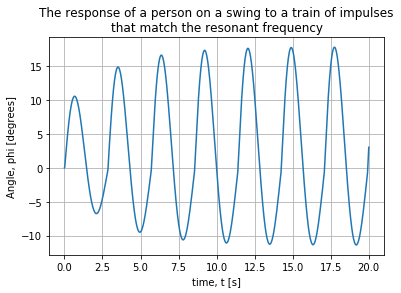

In [7]:
# create a Dirac comb
u = np.zeros(1000)
period=float(2*np.pi/w_max)
int_t = round(50.0*period)
for i in range(1, 1000, int_t):
    u[i] = 50.0

# use the output method to find the response to the Dirac comb
t, phi, x = phi_s.output(U=u, T=t)
plt.plot(t, np.degrees(phi))
plt.xlabel('time, t [s]')
plt.ylabel('Angle, phi [degrees]')
plt.title('The response of a person on a swing to a train of impulses\nthat match the resonant frequency')
plt.grid()

Now you can see the signal growing as we push the person on the swing  
We are pushing them at the resonant frequency  
In the steady state they are now swinging with a total range of about $30^\circ$!

## 3.4.6 Relating the location of the poles to the resonant peak

The image below shows the poles plotted on the s-plane  
it also shows the Bode plot we see above, projected onto the s-plane  
[image reference](https://electronics.stackexchange.com/questions/112521/resonant-frequency-from-bode-plot/112525)  
![image3!](./images_s3/image_3_4_3.png)  
In order for a system to be resonant, the angle $\phi$ shown in the figure on the right,  
must be greater than $45^\circ$  
  
The case when the pole is at $45^\circ$ is called the Butterworth case  
[Butterworth filter](https://en.wikipedia.org/wiki/Butterworth_filter)  
which is also called the maximally flat case  
second order poles above $45^\circ$ have a resonant peak

## 3.4.7 Resonant frequency, Bandwidth, Quality factor

Three terms associated with the resonant peak are the resonant frequency, the bandwidth, and the quality factor  
They can all be found very simply from the location of the poles on the complex plane  
The exact location of the peak in the Bode is only approximately $\omega_n$, but it is close enough for resonant systems  
The figure below shows the relationship between the three quantities  
![image4!](./images_s3/image_3_4_4.png)  
It is also very easy to relate these quantities to the denominator of the transfer function  
  
The code cell below shows the relationships for our example

In [8]:
w_n = np.abs(phi_s.poles[0])
B = -2*phi_s.poles[0].real
Q = w_n/B
print('the denominator of the the transfer function is', phi_s.den)
print('the resonant frequency, w_n =', w_n)
print('w_n squared is the last term in the denominator ', w_n**2)
print('the Bandwidth is the middle term in the denominator, B =', B)
print('the Quality factor, Q =', Q)

the denominator of the the transfer function is [1.    0.625 4.905]
the resonant frequency, w_n = 2.21472345903501
w_n squared is the last term in the denominator  4.9049999999999985
the Bandwidth is the middle term in the denominator, B = 0.6249999999999998
the Quality factor, Q = 3.543557534456017


## 3.4.8 Resonant Filters - Op amp topologies

There are many tools on the internet capable of designing filters  
The tool at the link below is one example  
[filter design](http://sim.okawa-denshi.jp/en/Fkeisan.htm)  
  
Two types of op amp circuits are shown in the design tool  
one called the Sallen-Key circuit, named after its designers  
the other is called the multiple feedback circuit  
The multiple feedback circuit has better stability properties than the Sallen-Key, but they both work very well  
  
To use the tool, first choose the topology.   
We will create a multiple feedback low-pass filter to match our pendulum example  

Scroll down to where it says  
"Calculate the R and C values for the multiple feedback filter at a given frequency and Q factor"

You then enter $f_c$, which is just $\frac{\omega_n}{2\pi}$  
in our example, $f_c=\frac{2.215}{2*pi}=0.352 [Hz]$
  
Then enter the Q factor, which is 3.54  
  
And finally enter the gain at low frequencies, which is -20dB, or 0.1  
You have to enter a minus sign because the multiple feedback circuit is an inverting amplifier  
![image5!](./images_s3/image_3_4_5.png)  

The tool even makes the Bode plot for us  
Notice, their x-axis is marked in [Hz], rather than [rad/s]
![image6!](./images_s3/image_3_4_6.png)  